TASK 1

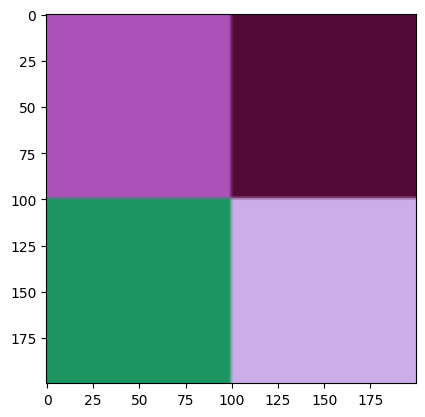

In [5]:
import cv2 as cv
import numpy as np
import random
import matplotlib.pyplot as plt

r = 0
g = 0
b = 0

dx= [(0,50),(50,100), (0,50), (50,100)]
dy = [(0,50),(0,50),(50,100),(50,100)]

img = np.zeros((100,100,3),np.uint8)

for i in range(4):
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    img[dx[i][0]:dx[i][1] , dy[i][0]:dy[i][1]] = r,g,b

img = cv.resize(img,(200,200))
img =cv.cvtColor(img , cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

TASK 2

In [6]:
import cv2 as cv


vid = cv.VideoCapture(0)
cap = 0

saved = cv.VideoWriter("video.avi", cv.VideoWriter_fourcc(*'MJPG'), 20.0, (720,480))
r=0
g=0
h=0
x=0
s=0
width,height = 720,480

while 1:
    success, img = vid.read()
    img = cv.resize(img,(width,height))

    if x:
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        M = cv.getRotationMatrix2D((width/2,height/2),90,1) 
        rotate = cv.warpAffine(img,M,(width,height)) 
        cv.imshow("GRAY", gray)
        cv.imshow("HSV",hsv)
        cv.imshow("Rotated",rotate)
    if g:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    elif h:
        img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    if r:
        M = cv.getRotationMatrix2D((width/2,height/2),90,1) 
        img = cv.warpAffine(img,M,(width,height)) 
    if s:
        saved.write(img)
    cv.imshow("final", img)
    input = cv.waitKey(1)
    
    if input == ord('c'):
        cv.imwrite(f"img {cap}.png", img)
        cap+=1
    elif input == ord('s'):
        s=1
    elif input==ord('g'):
        g,h,x=1,0,0
    elif input == ord('h'):
        h,g,x=1,0,0
    elif input == ord('z'):
        if x:
            cv.destroyAllWindows()
        g=h=x=r=0
    elif input == ord('r'):
        r,x=1,0
    elif input == ord('x'):
        x,h,g=1,0,0
    elif input == ord('q'):
        break
if s:
    vid.release()
    saved.release()

TASK 3

72.23122214660722
16.675891599775927


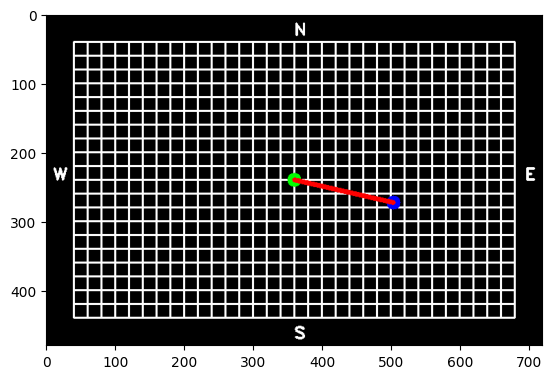

In [2]:
from cmath import sin
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

img = np.zeros((480,720,3), np.uint8)
width= 720
height = 480

i =60
speed = eval(input("insert speed in m/s "))
time = eval(input("insert time in hours "))
angle = eval(input("insert angle in degrees "))
time = time*60*60
speed = speed*time
speed/=1000



x = speed*math.sin(math.radians(angle))
y = speed * math.cos(math.radians(angle))
cv.rectangle(img, (40,40),(680,440),(255,255,255),2)
y*=-1
print(x)
print(y)
x*=2
y*=2
while i <680:
    cv.line(img,(i,40),(i,440),(255, 255, 255), 2)
    if i<440:
        cv.line(img, (40,i), (680,i), (255, 255, 255), 2)
    i+=20

x+=(width/2)
y+=(height/2)
cv.putText(img, "N", (int(width/2),30), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,255,255),2)
cv.putText(img, "S", (int(width/2),470), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,255,255),2)
cv.putText(img, "W", (10,int(height/2)), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,255,255),2)
cv.putText(img, "E", (695,int(height/2)), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,255,255),2)
cv.circle(img, (int(width/2), int(height/2)), 10, (0, 255, 0), cv.FILLED)
cv.circle(img, (int(x),int(y)),10, (0,0,255), cv.FILLED)
cv.line(img,(int(width/2), int(height/2)), (int(x),int(y)), (255, 0, 0), 5)
plt.imshow(img)

TASK 4

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


circles = []
def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        circles.append([x,y])
    if event == cv.EVENT_RBUTTONDOWN:
        circles.pop()


while 1:
    img = np.zeros((480,720,3), np.uint8)
    for i in circles:
        cv.circle(img,i,50,(0,255,0),1)
    cv.imshow("Done", img)
    cv.setMouseCallback("Done", mouse)
    if cv.waitKey(1) == ord('q'):
        break


: 

TASK 5

In [1]:
from ctypes import pointer
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
myPoints =[]
global c
c=0
def mouse(event,x,y,flag,params):
    global c
    if event == cv.EVENT_LBUTTONDOWN:
        myPoints.append([x,y])
        c+=1
    if event == cv.EVENT_RBUTTONDOWN:
        myPoints.pop()
        c-=1
    if event == cv.EVENT_RBUTTONDBLCLK:
        myPoints.clear()
        c=0

def reorder():
    x,y=0,0
    mx=1e9
    newPoints = []
    for i in myPoints:
        if i[0]+i[1]<mx:
            mx = i[0]+i[1]
            x,y = i[0],i[1]
    newPoints.append([x,y])

    mx=0
    for i in myPoints:
        if i[0]-i[1]>mx:
            mx = i[0]-i[1]
            x,y = i[0],i[1]
    newPoints.append([x,y])

    mx=1e9
    tmpy,tmpx=y,x
    for i in myPoints:
        if i[0]-i[1]<mx:
            mx = i[0]-i[1]
            x,y = i[0],i[1]
    newPoints.append([x,y])
    
    

    mx=0
    for i in myPoints:
        if i[0]+i[1]>mx:
            mx=i[0]+i[1]
            x,y=i[0],i[1]
    newPoints.append([x,y])
    return newPoints



img = cv.imread("/Users/hany/Downloads/tasks_images_/task_5/jhonsmith.jpg")
width = img.shape[1]
height = img.shape[0]

while True:
    copy = img.copy()
    cv.imshow("original",copy)
    cv.setMouseCallback("original", mouse)
    if c==4:
        myPoints = reorder()
        pts1 = np.float32(myPoints)
        pts2 = np.float32([[0, 0],[width, 0], [0, height],[width, height]])
        matrix = cv.getPerspectiveTransform(pts1, pts2)
        warp = cv.warpPerspective(img, matrix, (width, height))
        warp = cv.cvtColor(warp, cv.COLOR_BGR2RGB)
        plt.imshow(warp)
    for i in myPoints:
        cv.circle(copy, i, 5,(0,255,0),cv.FILLED)
    if cv.waitKey(1)==ord('q'):
        break


KeyboardInterrupt: 

: 

: 